# Probability 1

## Introduction to Probability


Let's start with a histogram shown below. For instance, we measured 100 people's heights (between 5 and 7 feet) and plot a histogram for their heights. Because the values of heights are continuous, we define several intervals to make our histogram easy to read. The first bin is `[5.00, 5.25)` (including 5.00, but excluding 5.25.) and the second `[5.25, 5.50)`, etc.. Only the last bin `[6.75, 7.00]` includes 7.00. Here, `[` and `)` are math notations that define intervals. `[` or `]` means including, but `(` or `)` means excluding. If we want to know the probability of a person's height falling into `[5.75, 6.00)`, we can use the number of people in that bin, which is 11, divided by total number 100. It gives us the probability of 11%.


<IPython.core.display.Javascript object>


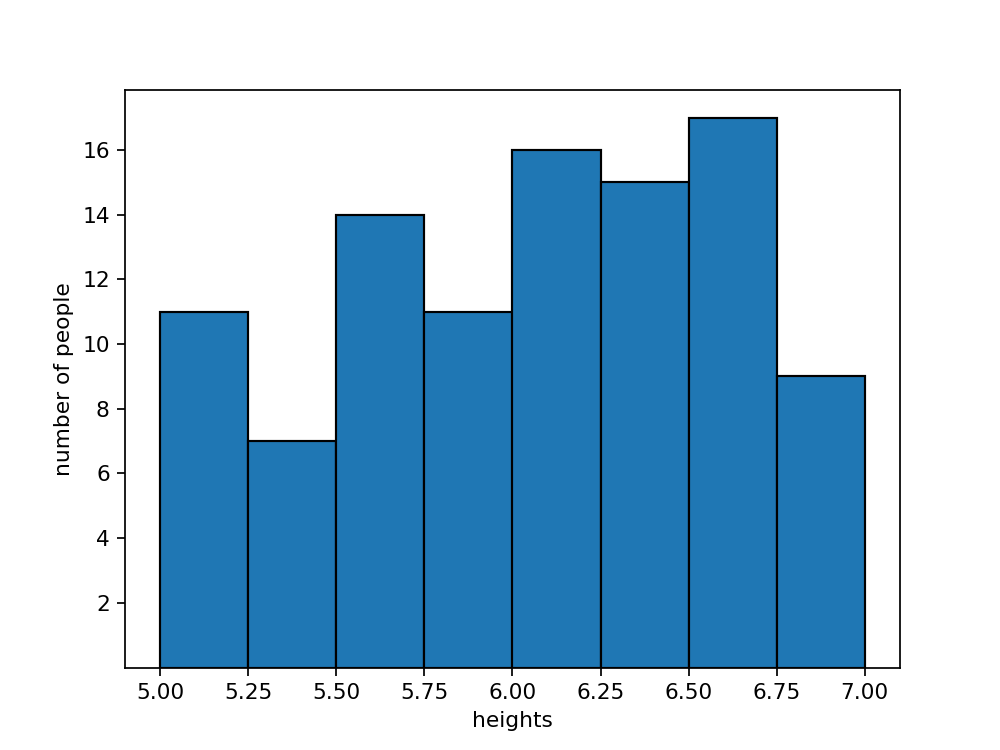

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
np.random.seed(20)
heights = np.random.uniform(5, 7, size=100)
plt.yticks(range(2, 20, 2))
plt.xlabel('heights')
plt.ylabel('number of people')
plt.hist(heights, range=(5,7), bins=8, histtype='bar', ec='black')
plt.show()

### Solution code

```python
# Just run above code
```

### Definition of probability

By some probability of an outcome, we mean the fraction of the number of repeated observations of a certain outcome.

Suppose we take a `fair` coin:

$Probability\;of\;Heads = \frac{Number\;of\;heads}{Total\;number\;of\;throws} = 0.5$

Its frequentist definition (when number of throws goes toward infinity):

$P = \lim_{throws \to \infty} \frac{Number\;of\;heads}{Total\;number\;of\;throws} = 0.5$

When consider throwing a coin for multiple times, the general result is:

1. Probability for throws = 2 almost will never be 50/50 or 0.5
2. Probability for throws = 20, 30 or more may be true, which can be 0.5.

<img src="../../../images/probability_coin.png" style="width:50vw">
<b>Reference:</b> The Feynman Lectures on Physics, retrieved from http://www.feynmanlectures.caltech.edu/I_06.html <br>

From the above image we can see that when number of throws is small, large fluctuations in probability will show. If the number of throws increases, it will go toward 0.5 and fluctuations become relatively small.
Suppose $N_H$ is the number of heads, $N_{Total}$ is the total number of throws, in the following equation:

$Probability\;of\:Heads = 0.5 = \frac{N_H}{N_{Total}}$

$N_H$ is our estimate of the number of repeated observations of Heads, not the actual number of times we observe Heads.
As you saw in the case of a real coin, $N_H$ is almost never

$N_H \neq \frac {N_{Total}}{2}\;\;   (in\:real\:life\:for\:small\: N_{Total})$


Probabilities arise in many problems dealing with random events where an outcome is not known or cannot be predicted reasonably confidently. 

An event is called random if it is practically impossible to predict from the initial state.

For example , the toss of a coin could yield an outcome of a H or T. Similarly the outcome of a roll of a dice would yield a value in the set : {1,2,3,4,5,6}
The value of a probability is a number between 0 and 1 inclusive. An event that cannot occur has a probability (of happening) equal to 0 and the probability of an event that is certain to occur has a probability equal to 1.(see probability scale below).

In part 1 of this probability course we will introduce you to some of the basics of Probability. The topics include:

1. What are Random Variables (Discrete and Continuous Random Variables)
    
2. Probability mass function 

3. Probability density function



## 1.0 Random Variables


Before we define what are Random Variables, we must see what are random experiments and events. 


A <b>Random experiment</b> is any real world event such as a roll of a dice, a game of soccer or any event that brings random results.

According to wikipedia, <b>an event</b> within probability theory is a set of outcomes of an experiment (a subset of the sample space) to which a probability is assigned.

In the game of soccer, there could be a number of goals scored by either of the teams. The number of goals scored by a given team is a random variable.

Hence we can define a random variable as, a real-valued variable whose value is determined by an underlying random experiment. In other words, it is a quantitative representation of the outcomes of an event, which is the set/subset of all possible outcomes.

Given an experiment and set of possible outcomes, random variable associates a particular number to each outcome. Consider an event where a coin is tossed twice. We can define a sample space as<br> S = {HH, HT, TH, TT}<br>
This sample space includes all possible events, HH is a single event among them. The random variable where number of Heads occur is denoted as:
$$ X \to \{0, 1, 2\}$$ 
Random variables can be either continuous or discrete. A random variable is discrete if its range is finite or at most countably infinite. A random variable is continuous if it can take uncountably infinite number of values.

<img src="../../../images/cointoss.png" style="width:35vw">


### Exercise

* What is the random variable that would take the sum of two dice? Assign the values to a list, S.





In [ ]:
S = []

### Solution

```python
S = list(range(2, 13))
print(S)
```

Let's think about the following two questions:<br>
1.How many numbers lie between 1 and 5? <br>
2.How many numbers lie between 1.1 and 5.28? <br>

Before answering the questions, we need to ask which type of numbers are we talking about?<br>(5 as the answer for question 1 when the number is integer, $\infty$ as the answer for question 2 when the number is real number).<br>
The above difference is important since we can define discrete and continuous random variables.


### 1.1 Discrete Random Variables

A random variable is discrete if its range is a countable set. 

In the above example of toss of a coin thrice, the value of Heads count would be {0,1,2,3}. These are countable and hence this is a Discrete Random Variable.


### 1.2 Continuous Random Variables


A continuous random variable X has a range in the form of an interval or a union of non-overlapping intervals on the real line.

For example the temperature in Boston in the month of june would be a continuous random variable. The variable can be any value such as 73.55 °F


### Exercise:

In the below code, write logic to create a random variable 'tosses' that has the outcome of 10 different tosses of a coin. 

In [ ]:
#Toss of a coin simulation
import random
from collections import Counter

def toss_coin(n):
    tosses = []
    for i in range(n):
        if random.getrandbits(1) == 0:
            tosses.append('H')
        else:
            tosses.append('T')
    return tosses

def get_probability(tosses, result):
    counter = Counter(tosses)
    return counter[result]/len(tosses)



### Solution

```python
tosses = toss_coin(10)
print(tosses)

```

## Probability Mass Functions (PMF)

If X is a random variable denoting the event with possible values such that X = {x1,x2,x3,..} where the possible values is a set of countable values then the probability P(x) is called as Probability Mass Function (PMF) since the values are discrete values. We denote the probability of the event that X = x by p(X = x) or just p(x) for short.

For example, let A be the event of two tosses of a coin and the outcome X denotes the set number of heads.
Here, our sample space is given by

S={HH,HT,TH,TT}.
The number of heads will be 0, 1 or 2. Thus the range of values $R_x$ will be

$R_X=\{0,1,2\}.$


The PMF of X given by $P_X(k)$ will be:

$P_X(k)=P(X=k) \textrm{ for } k=0,1,2.$

From the above, for x=0, that is, for 0 Heads i two tosses of a coin $P_X(0)$ will be given by:

$P_X(0)=P(X=0)=P(TT)=\frac{1}{4}$

Similarly for the above probability mass function $P_X(2)$ which is the probability for one Head in two tosses is given by:

$P_X(1) =P(X=1)=P(\{HT,TH\})=\frac{1}{4}+\frac{1}{4}=\frac{1}{2}$

We can plot the probability values:
<img src="../../../images/probability_heads.png" style="width:50vw">
From the above figure we can see that the sum of all the probability is 1, we can write it in either way:<br> $\sum_{i=1}^Nf(x_i)=1$ <br> 

$\sum _{i=1}^NP(X=x_i)=1$<br>
where P is a function of X and P depends on X. To further investigate, the former equation is<br>

$\sum_{i=1}^NP(X=x_i)=P(X=0\:heads)+P(X=1\:heads)+P(X=2\:heads)=\frac{1}{4}+\frac{1}{2}+\frac{1}{4}=1$

The best way to ensure your probability be correct is to sum up all the events' probabilities, and it yields the result of 1. For instance, we want to calculate the probability of people liking ice creams or not. There are only two events here, like or dislike. We need to ensure the following equation is always true:<br> $1=P(like\:ice\:cream)+P(dislike\:ice\:cream)$

### Example 1
Plot a probability mass function for throws of 2 dice.

To do this, we first need to define the sample space:<br>
<pre>
Sample Space = {1,1   1,2   1,3   1,4   1,5   1,6
                2,1   2,2   2,3   2,4   2,5   2,6
                3,1   3,2   3,3   3,4   3,5   3,6
                4,1   4,2   4,3   4,4   4,5   4,6
                5,1   5,2   5,3   5,4   5,5   5,6
                6,1   6,2   6,3   6,4   6,5   6,6}
</pre>
There are 36 entries total, which means we have 36 ways to get values from 2 dice. What are the total values we can get?
<pre>
Total values = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
</pre>

How many ways?

$P(X=2)\Rightarrow\{1,1\}=\frac{1}{36}$<br>
$P(X=3)\Rightarrow\{1,2\;\;\;2,1\}=\frac{2}{36}$<br>
$P(X=4)\Rightarrow\{2,2\;\;\;1,3\;\;\;3,1\}=\frac{3}{36}$<br>
$P(X=5)\Rightarrow\{3,2\;\;\;1,4\;\;\;4,1\;\;\;2,3\}=\frac{4}{36}$<br>
$P(X=6)\Rightarrow\{3,3\;\;\;1,5\;\;\;5,1\;\;\;4,2\;\;\;2,4\}=\frac{5}{36}$<br>
$P(X=7)\Rightarrow\{3,4\;\;\;6,1\;\;\;1,6\;\;\;4,3\;\;\;2,5\;\;\;5,2\}=\frac{6}{36}$<br>
$P(X=8)\Rightarrow\{4,4\;\;\;6,2\;\;\;2,6\;\;\;5,3\;\;\;3,5\}=\frac{5}{36}$<br>
$P(X=9)\Rightarrow\{4,5\;\;\;5,4\;\;\;6,3\;\;\;3,6\}=\frac{4}{36}$<br>
$P(X=10)\Rightarrow\{5,5\;\;\;6,4\;\;\;4,6\}=\frac{3}{36}$<br>
$P(X=11)\Rightarrow\{6,5\;\;\;5,6\}=\frac{2}{36}$<br>
$P(X=12)\Rightarrow\{6,6\}=\frac{1}{36}$<br>
Based on the above equations, we can plot the probability mass function:

<img src="../../../images/probability_mass_function.PNG" style="width:50vw">

Why do we plot this probability mass function?<br>
$\to$ Without looking at the data/having no data, we can predict how often we may get a 5 or a 7 etc. if we roll two dice.<br>
$\to$ We are generalizing here. This is true for all 6 sides fair dice which contain numbers between 1-6 on each side.

### Example 2
An example dataset:

John runs an ice cream shop and he hires Tom to build him a model of sales data. The following is the dataset:<br>
<table>
    <tr>
    <th>Name</th>
    <th>Gender</th> 
    <th>Flavor</th>
  </tr>
  <tr>
    <td>Customer1</td>
    <td>Female</td> 
    <td>Chocolate</td>
  </tr>
  <tr>
    <td>Customer2</td>
    <td>Male</td> 
    <td>Chocolate</td>
  </tr>
    <tr>
    <td>Customer3</td>
    <td>Female</td> 
    <td>Vanilla</td>
  </tr>  
    <tr>
    <td>Customer4</td>
    <td>Male</td> 
    <td>Vanilla</td>
  </tr>
    <tr>
    <td>Customer5</td>
    <td>Female</td> 
    <td>Mint</td>
  </tr>
    <tr>
    <td>Customer6</td>
    <td>Female</td> 
    <td>Vanilla</td>
  </tr>
    <tr>
    <td>Customer7</td>
    <td>Female</td> 
    <td>Chocolate</td>
  </tr>
    <tr>
    <td>Customer8</td>
    <td>Male</td> 
    <td>Mint</td>
  </tr>
</table>

From this data we can extract a summary table:
<table>
    <tr>
        <th></th>
        <th>Chocolate</th>
        <th>Vanilla</th>
        <th>Mint</th>
        <th>Gender_total</th>
    </tr>
    <tr>
        <th>Male</th>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>3</td>
    </tr>
    <tr>
        <th>Female</th>
        <td>2</td>
        <td>2</td>
        <td>1</td>
        <td>5</td>
    </tr>
    <tr>
        <th>Flavor_total</th>
        <td>3</td>
        <td>3</td>
        <td>2</td>
        <td>8</td>
    </tr>
</table>

Then we can convert it to probability:
<table>
    <tr>
        <th></th>
        <th>Chocolate</th>
        <th>Vanilla</th>
        <th>Mint</th>
        <th>P(gender)</th>
    </tr>
    <tr>
        <th>Male</th>
        <td>1/8</td>
        <td>1/8</td>
        <td>1/8</td>
        <td>3/8</td>
    </tr>
    <tr>
        <th>Female</th>
        <td>1/4</td>
        <td>1/4</td>
        <td>1/8</td>
        <td>5/8</td>
    </tr>
    <tr>
        <th>P(flavor)</th>
        <td>3/8</td>
        <td>3/8</td>
        <td>1/4</td>
        <td>1</td>
    </tr>
</table>

Now let's start from the marginal distribution. We want a distribution for our random variable. The following is the marginal distribution plot.
<img src="../../../images/probability_marginal_distribution.PNG" style="width:50vw">

We can also plot the joint distribution for this dataset.
<img src="../../../images/probability_joint_distribution.PNG" style="width:50vw">

Mathematical we can write $P(Flavor, Gender)\;\;\leftarrow \;Joint\; distribution$ <br>
We Learnt about marginals, so how do we get marginals from a joint distribution?<br>
For example, we can get the marginal $P(Flavor)$ by adding the joint distribution along the gender axis.

$P(flavor)=\sum_{i=1}^NP(flavor, gender=x_i)=P(flavor, gender=male)+P(flavor, gender=female)=\frac{3}{8}+\frac{5}{8}=1$<br>

$P(flavor=chocolate)=P(flavor=chocolate, gender=male)+P(flavor=chocolate, gender=female)=\frac{1}{4}+\frac{1}{8}=\frac{3}{8}$<br>

We can do the same thing to the other flavors<br> $P(flavor=vanilla)=\frac{1}{8}+\frac{1}{4}=\frac{3}{8}$ <br>$P(flavor=mint)=\frac{1}{8}+\frac{1}{8}=\frac{1}{4}$

Based on the above information, we can also get $P(gender)=P(gender,flavor=chocolate)+P(gender, flavor=vanilla)+P(gender, flavor=mint)$



### Exercise

In the code cell, for the probability mass function $P_X(2)$ find the probability for two Heads in two tosses and assign it to variable p_x2.

In [ ]:
# pmf
p_x2 = 0

#write your code below


### Solution Code

```python
# for two heads the set S will be {HH} which is one out of four values. Hence :
p_x2 = 1/4

```

## Probability Density Function (PDF)

Probability density function (PDF) is a statistical expression that defines a probability distribution for a continuous random variable. Since continuous random variables can take any value such as 75.55 for temperature of a given city it is generally represented as a density. Due to this the Probability Density Function represents the area under the curve usually between an  interval in which the variable will fall. The total area in this interval of the graph equals the probability of a continuous random variable occurring.

For this reason, the PDF of a single value will be 0, as the area under the curve for a line will be zero. Hence PDF is defined for a range of values.

Given a pdf, we can compute the probability of a continuous variable being in a finite interval as follows:

$ P(a \leq X \leq b) = \int_{a}^{b} f_X(x)dx $

Suppose we take the height of individuals. So what is the probability that the height of an individual is between 4ft and 5ft?

To answer this question, we should write $P(x=4\leq height \leq5)$. In this case we can't write a nice sample set like the discrete variables, because all values between 4 and 5 are possible. The sample set can include $\infty$ values.

And notice -

We cannot write something like $P(X=height)= some\:value$<br>
We have to write something like $P(X=range\:of\:heights)= some\:value$

For this question we should write $P(X=4\leq height \leq 5)=\int_4^5p(x)dx$


###  Execrise:

Click the run button to run the below code to display area under the curve.

In [ ]:
# pdf
import numpy as np
import matplotlib    
import matplotlib.pyplot as plt

def normal(power, mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs(np.power(val-mean, power))
    b = np.exp(-(diff)/(2*std*std))
    return a*b

pdf_array = []
array = np.arange(-2,2,0.1)
print(array)
for i in array:
    print(i)
    pdf = normal(2, 0, 0.1, i)
    print(pdf)
    pdf_array.append(pdf)

plt.plot(array, pdf_array)
plt.ylabel('some numbers')
plt.axis([-2, 2, 0, 5])
plt.show()




### Solution

Just Run the code above to display the area under the curve.

## Conditional Probability

For her vacation in Hawaii, Elizabeth has packed 5 pants, 4 skirts and 8 shirts. On her first day venturing out to explore the islands, Elizabeth is running late. In a rush to dress up, she opens her briefcase and picks out two pieces of clothing at random. Given that her first pick is a skirt, what is the probability that she is in luck and picks a shirt to go with it.

This is a typical example of conditional probability, which is the probability of a second event happening given that a first event has already occured. This particular case of conditional probability deals with dependent events. Elizabeth has to pull out a second piece of clothing that matches her first pick. Elizabeth having a matching pair of clothing is dependent on her first and second pick.

As most of you might have already guessed, the probability is: $$P(MatchingPair) = \frac{4}{17} * \frac{8}{16}$$ <br>
(Hint): She first picks a skirt with probability 4/17, which leaves her with 3 remaining skirts, 5 pants and 8 shirts. Out of the 16 remaining clothes, her only favourable picks are the 8 shirts, thus giving us 8/16. Our final answer is a combination of the first and second pick, thus giving us our final answer = 4/17 X 8/16

Let's take another look at <b>Example 2:</b><br>
Summary:
<table>
    <tr>
        <th></th>
        <th>Chocolate</th>
        <th>Vanilla</th>
        <th>Mint</th>
        <th>P(gender)</th>
    </tr>
    <tr>
        <th>Male</th>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>3</td>
    </tr>
    <tr>
        <th>Female</th>
        <td>2</td>
        <td>2</td>
        <td>1</td>
        <td>5</td>
    </tr>
    <tr>
        <th>P(flavor)</th>
        <td>3</td>
        <td>3</td>
        <td>2</td>
        <td>8</td>
    </tr>
</table>

Probability:
<table>
    <tr>
        <th></th>
        <th>Chocolate</th>
        <th>Vanilla</th>
        <th>Mint</th>
        <th>P(gender)</th>
    </tr>
    <tr>
        <th>Male</th>
        <td>1/8</td>
        <td>1/8</td>
        <td>1/8</td>
        <td>3/8</td>
    </tr>
    <tr>
        <th>Female</th>
        <td>2/8</td>
        <td>2/8</td>
        <td>1/8</td>
        <td>5/8</td>
    </tr>
    <tr>
        <th>P(flavor)</th>
        <td>3/8</td>
        <td>3/8</td>
        <td>2/8</td>
        <td>1</td>
    </tr>
</table>

1. What is the probability that girls will eat chocolate flavored ice cream?<br>
This question can be broken down into -<br>
(A) How many people ate chocolate ice cream?<br>
(B) How many of those were girls?<br>

    Answer $\rightarrow$ 3 people ate chocolate, and 2 out of 3 were girls. Hence,
    $$P(girls\;eating\;chocolate)=\frac{2}{3}$$

We don't want to count this each time, we want a simple way of doing this. We can do the calculation based on the probability table:
$$\frac{P(chocolate \; and \; girls)}{P(chocolate)}=\frac{\frac{2}{8}}{\frac{3}{8}}=\frac{2}{8}*\frac{8}{3}=\frac{2}{3}$$

2. Now let's calculate, what are the probabilities of boys eating mint, and girls eating vanilla?<br>
$$P(boys \; eating \; mint)=\frac{P(mint\;and\;boys)}{P(mint)}=\frac{\frac{1}{8}}{\frac{2}{8}}=\frac{1}{2}$$
$$P(girls \; eating \; vanilla)=\frac{P(vanilla\;and\;girls)}{P(vanilla)}=\frac{\frac{2}{8}}{\frac{3}{8}}=\frac{2}{3}$$

We don't always want to write things like
$P(boys\;eating\; mint)$, instead, we write them as $P(boys|mint)$. 

$P(boys|mint)$ is read as prbability of boys given mint. Technically it's $P(gender=boys|flavor=mint)$. In stating this there is an important point to keep in mind. We can not claculate $P(boys|mint)$ without knowing all the people who have eaten mint ice cream. This is why we say that the flavor variable has been observed before we calculate $P(boys|mint)$.

Now let's calculate:
$$P(mint|boys)=\frac{P(boys\;and\;mint)}{P(boys)}=\frac{\frac{1}{8}}{\frac{3}{8}}=\frac{1}{3}$$<br>
Comparing with $P(boys|mint)=\frac{1}{2}$, We can see that $$P(boys|mint)\neq P(mint|boys)$$.

Most of the times these two probabilities won't be the same, only if
$$1=\frac{P(boys|mint)}{P(mint|boys)}=\frac{P(mint\;and\;boys)}{P(mint)}\;/\;\frac{P(boys\;and\;mint)}{P(boys)}=\frac{P(mint\;and\;boys)}{P(mint)}*\frac{P(boys)}{P(boys\;and\;mint)}=\frac{P(boys)}{P(mint)}$$

If $P(boys)=P(mint)$ then $P(boys|mint)=P(mint|boys)$, unless $P(boys)$ and $P(mint)$ are equal we cannot say that $P(boys|mint)$ is equal to $P(mint|boys)$. Even with $P(boys)=P(mint)$, there may be other factors that determine why $P(boys|mint)\neq P(mint|boys)$. <b>BE CAREFUL!</b>

There is something interesting in the intermediate step here that we should look at:<br>
$$\frac{P(boys|mint)}{P(mint|boys)}=\frac{P(boys)}{P(mint)}$$<br>

We can write this as:<br>
$$P(boys|mint)=\frac{P(mint|boys)*P(boys)}{P(mint)}$$

This is a form of <b>bayes rule</b>. We can generalize the above in terms of the random variables. For example:

$$P(gender|flavor)=\frac{P(flavor|gender)*P(gender)}{P(flavor)}$$<br>
where $P(gender)$ and $P(flavor)$ are marginals and $P(flavor|gender)$ is a conditional.

We'll start talking about the above terms in general forms.


## Definition:

In probability theory, conditional probability is the probability of an event given that another event has occured. Denoted as <strong>P(B|A)</strong>, is the probabilty of event B given event A has already occured.To put this into persepective, let us assume that the probability of rain on any random day is 10%. But if we know that there is a storm the same day, then the probability of rain will be much higher.

The concept of conditional probability is one of the most fundamental concepts in probability theory. While it may seem very trivial, conditional probabilities can be quite confusing and require careful attention.<br>
<strong>Note:</strong> If events A and B are <strong>independent</strong>, then <strong>P(B|A)</strong> is simply <strong>P(B)</strong>.

## Independent Events:
Now let us prove the note mentioned earlier for independent events using this equation:

We know that, $$P(A|B) = \frac{P(A∩B)}{P(B)}$$

For independent events, we have <strong>P(A∩B) = P(A) X P(B)</strong> . Substituting this in the equation above, we get:

$$P(A|B) = \frac{P(A) X P(B)}{P(B)}$$<br>

$$P(A|B) = P(A)$$

## Mutually Exclusive Events:

Two events are said to be mutually exclusive when the two events cannot occur at the same time. For a given sample space either one or the other can occur, not both. They have their probabilities defined as: $$P(A)+P(B)=1$$
Furthermore,$$P(A∩B) = 0$$

Therfore the conditional probability for mutually exclusive events is <strong>0</strong>

### Exercise

You toss a fair coin three times, write a program to compute the following:

1. What is the probability of three heads,<strong> HHH</strong>? [use P1 as variable for final ans]
2. What is the probability that you observe exactly one heads? [use P2 as variable for final ans]
3. Given that you have observed at least one heads, what is the probability that you observe at least two heads? [use P3 as variable for final answer.

In [ ]:
#Write your solution code below

### Solution

```python
#Part 1:Since each toss is independent, the probability of getting a head on any toss is 1/2
P1 = 0.5*0.5*0.5

#Part 2: Let us create the sample space
#S = [HHH,HHT,HTH,THH,HTT,TTH,THT,TTT] the favourable events are [HTT, THT, TTH]
P2 = 3/8

#Part 3: Let s1 be the event that you observe one head, and s2 be the event for two heads
#we have to find P(s2|s1), where P(s1) = 1 - P{TTT} = 7/8 and P(s2) = 4/8
#P(s2|s1) = P(s2 ∩ s1)/P(s1)
P3 = (4/8)*(8/7)

#print the answers:
print(P1,P2,P3)

```

## Bayes' Theorem:

Named after the famous English statistician Thomas Bayes, Bayes' Theorem (or Bayes' Rule). The theorem provides a way to revise exsisting predictions or hypothesis given new or additional evidence. It is a direct application of conditional probability.

The formula is as follows:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

And people generally like to expand out the bottom part as
$$P(B)=\sum_i^N P(B|A_i)*P(A_i)$$
which is the same as in <b>Example 2:</b>
$$P(flavor)=\sum_{i=1}^N P(flavor|gender=x_i)*P(gender=x_i)$$
Remember $P(flavor)$ is a distribution NOT a single value!

### Derivation:

Let us derive this equation using conditional probability. We know from conditional probabilities that:

$$P(A|B) = \frac{P(A∩B)}{P(B)}$$

re-arranging the terms, we get:
$$P(A∩B) = P(A|B).P(B)$$

Similarly,

$$P(B|A) = \frac{P(A∩B)}{P(A)}$$

$$P(A∩B) = P(B|A).P(A)$$

Now equating the above two results, we get:
$$P(A|B).P(B) = P(B|A).P(A)$$

$$P(A|B) = \frac{P(B|A).P(A)}{P(B)}$$

Let us better understand the theorem from a simple example

<strong>Example:</strong> It is the flu season and you visit your personal physician for a regular checkup. The doctor selects you at random to test for Bird flu. The virus is currently suspected to affect 1 in 10000 people across the globe. The test is 99% accurate, meaning that the false positive (you test positive when you do not have the flu) is 2%. The false negative is 0%. Your test result shows you tested positive. What is the probability that you have bird flu.

<strong>Solution:</strong><br>
Let us first breakdown the problem:<br>
Let P(B) be the probability that you have bird flu <br>
Let P(T) be the probability of testing positive<br>
From the above problem statement, it is clear that we are required to find P(B|A)

As per Bayes' Theorem,

$$P(B|T) = \frac{P(T|B).P(B)}{P(T)}$$

From total probability, we have:
$$P(T) = P(T|B).P(B) + P(T|NB).P(NB)$$

where P(NB) is the probability of not having bird flu.

We have,
<strong>P(B) = 1/10000 = 0.0001<br>
P(NB) = 1 - P(B) = 0.9999<br>
P(T|B) = 1 </strong>[if you have swine flue you always test positive, false negativs is 0]<br>
<strong>P(T|NB) = 0.02 </strong>(false posititve rate)

Therefore, <strong>P(T) = P(T|B).P(B) + P(T|NB).P(NB)<br>
P(T) ≈ 0.02

$$P(B|T) = \frac{P(T|B).P(B)}{P(T)}$$
<br>
$$P(B|T) = \frac{1 X 0.0001}{0.02} ≈ 0.005$$
<br>
</strong>Even though you tested positive, there is only a <strong>0.5%</strong> chance you have bird flu.

## Summary
Core rules of probability that we need to remember are:

1. $P(X \;∩\; Y)=P(X)*P(Y)$    (for two independent events) 
2. $P(X \;∪\; Y)=P(X)+P(Y)$    (for two independent events)
3. $P(X|Y)=\frac{P(X,Y)}{P(Y)}$
4. $P(Y)=\sum_{i=1}^N P(X=x_i, Y)$
5. $P(Y)=\sum_i P(Y|X=x_i)*P(X=x_i)$

### Exercise

The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

In [ ]:
#Write your solution below

### Solution

```python
# Use the variable "ans" to denote the final probability
ans = (0.2*0.5)/(0.2*0.5+0.14*0.5)
print(ans)
```